In [1]:
import pandas as pd
import sqlite3

In [2]:
db = sqlite3.connect("IMDB.sqlite")

In [3]:
pd.read_sql_query("select Title,rating,max(TotalVotes) from IMDB",db)

,Title,Rating,max(TotalVotes)
0,Inception (2010),8.8,1609713


In [30]:
#longest runtime

df=pd.read_sql_query("select * from IMDB",db)
df.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [28]:
#pd.read_sql_query("select max(Runtime) from IMDB",db)

,max(Runtime)
0,99 min


In [31]:
df.Runtime=df['Runtime'].astype(str).str.replace("min","",regex= False).str.strip()  #regex means is we providing a regular expression

In [34]:
df.Runtime.value_counts()

       21
108     5
100     4
134     3
146     3
133     3
126     3
115     3
121     3
118     3
120     3
132     3
123     3
158     2
169     2
94      2
102     2
128     2
143     2
165     2
109     2
127     2
130     2
117     2
136     2
147     2
116     2
131     1
164     1
99      1
161     1
103     1
140     1
114     1
122     1
110     1
144     1
156     1
125     1
180     1
95      1
138     1
112     1
153     1
98      1
105     1
137     1
129     1
148     1
139     1
91      1
149     1
113     1
142     1
119     1
107     1
Name: Runtime, dtype: int64

In [35]:
import numpy as np

In [47]:
df.Runtime= df.Runtime.replace(" ","0")
df.Runtime= df.Runtime.replace("","0")

In [48]:
df.isnull().sum()

Movie_id        0
Title           0
Rating          0
TotalVotes      0
MetaCritic      0
Budget          0
Runtime         0
CVotes10        0
CVotes09        0
CVotes08        0
CVotes07        0
CVotes06        0
CVotes05        0
CVotes04        0
CVotes03        0
CVotes02        0
CVotes01        0
CVotesMale      0
CVotesFemale    0
CVotesU18       0
CVotesU18M      0
CVotesU18F      0
CVotes1829      0
CVotes1829M     0
CVotes1829F     0
CVotes3044      0
CVotes3044M     0
CVotes3044F     0
CVotes45A       0
CVotes45AM      0
CVotes45AF      0
CVotes1000      0
CVotesUS        0
CVotesnUS       0
VotesM          0
VotesF          0
VotesU18        0
VotesU18M       0
VotesU18F       0
Votes1829       0
Votes1829M      0
Votes1829F      0
Votes3044       0
Votes3044M      0
Votes3044F      0
Votes45A        0
Votes45AM       0
Votes45AF       0
VotesIMDB       0
Votes1000       0
VotesUS         0
VotesnUS        0
dtype: int64

In [49]:
df.Runtime=df.Runtime.astype(float)
df.Runtime=df.Runtime.astype(int)

In [50]:
df.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [62]:
df[df.Runtime == df.Runtime.max()][['Title','Runtime']]

,Title,Runtime
105,The Wolf of Wall Street (2013),180


# 3. IMDB profit

In [72]:
pd.read_sql_query("select Title,max((Domestic + Worldwide) - budget) from earning join IMDB on earning.Movie_id=IMDB.Movie_id",db)

,Title,max((Domestic + Worldwide) - budget)
0,Star Wars: The Force Awakens (2015),2.759886e+09


# 4. IMDB Least budget

In [75]:
pd.read_sql_query("select min(budget) from IMDB",db)

,min(budget)
0,1000000.0


In [77]:
pd.read_sql_query("select Title from IMDB where budget = 1000000",db)

,Title
0,Short Term 12 (2013)
1,Tyrannosaur (2011)


# imdb year top

In [84]:
df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107,110404,161864,132656,...,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,0,41980,50262,96477,...,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132,91765,127521,183578,...,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132,64428,96219,200144,...,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


In [85]:
pattern = r'\((\d{4})\)'

# Extract the year using the pattern
df['Year'] = df['Title'].str.extract(pattern, expand=False)
df.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Year
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,2013
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,2010
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100,28304,47501,99524,...,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,2011
3,49473,About Time (2013),7.8,225412,,12000000.0,123,38556,43170,70850,...,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,2013
4,14867,Amour (2012),7.9,76121,94,8900000.0,127,11093,15944,22942,...,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,2012


In [87]:
# coverting to int

df.Year=df.Year.astype(int)
df.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Year
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,2013
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,2010
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100,28304,47501,99524,...,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,2011
3,49473,About Time (2013),7.8,225412,,12000000.0,123,38556,43170,70850,...,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,2013
4,14867,Amour (2012),7.9,76121,94,8900000.0,127,11093,15944,22942,...,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,2012


In [88]:
data = df.copy()

In [89]:
# inserting this new data in sqlite db

data.to_sql("IMDB",db,if_exists="replace")

117

In [96]:
df.Year.unique()

array([2013, 2010, 2011, 2012, 2016, 2014, 2015])

In [94]:
pd.read_sql_query("select Year,Title,max(Domestic + Worldwide) from \
earning join IMDB on earning.Movie_id=IMDB.Movie_id group by Year",db)

,Year,Title,max(Domestic + Worldwide)
0,2010,Toy Story 3 (2010),1.481975e+09
1,2011,Rise of the Planet of the Apes (2011),6.585612e+08
2,2012,The Avengers (2012),2.142171e+09
3,2013,The Hunger Games: Catching Fire (2013),1.289680e+09
4,2014,Guardians of the Galaxy (2014),1.106505e+09
5,2015,Star Wars: The Force Awakens (2015),3.004886e+09
6,2016,Rogue One (2016),1.588235e+09


# 6. IMDB genre budget

In [111]:
new_df=pd.read_sql_query("select genre,sum(Budget) from \
IMDB join genre on IMDB.Movie_id=genre.Movie_id where genre != '' group by genre",db)
new_df

,genre,sum(Budget)
0,Action,4.332500e+09
1,Adventure,6.046700e+09
2,Animation,1.845200e+09
3,Biography,6.245000e+08
4,Comedy,1.740100e+09
5,Crime,4.265000e+08
6,Drama,2.614400e+09
7,Family,4.600000e+08
8,Fantasy,1.094000e+09
9,History,1.730000e+08


In [112]:
new_df['sum(Budget)'].sum()

24094200000.0

In [113]:
new_df['Percent']= (new_df['sum(Budget)'] / new_df['sum(Budget)'].sum())*100

In [114]:
new_df

,genre,sum(Budget),Percent
0,Action,4.332500e+09,17.981506
1,Adventure,6.046700e+09,25.096081
2,Animation,1.845200e+09,7.658275
3,Biography,6.245000e+08,2.591910
4,Comedy,1.740100e+09,7.222070
5,Crime,4.265000e+08,1.770136
6,Drama,2.614400e+09,10.850744
7,Family,4.600000e+08,1.909173
8,Fantasy,1.094000e+09,4.540512
9,History,1.730000e+08,0.718015


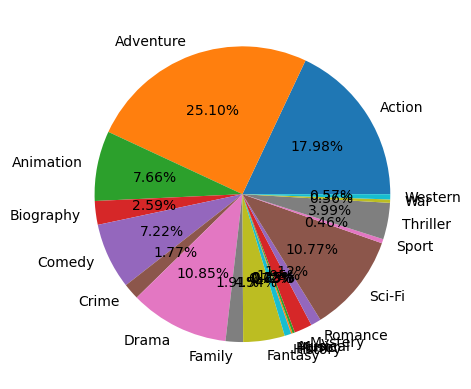

Action 17.98
Adventure 25.1
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [129]:
import matplotlib.pyplot as plt

plt.pie(new_df['Percent'],labels=new_df['genre'],autopct="%1.2f%%")
plt.show()

for i,r in new_df.iterrows():
    print(r['genre'],round(r['Percent'],2))

In [128]:
pd.read_sql_query("select sum(Budget) from IMDB",db)

,sum(Budget)
0,8.504000e+09


In [126]:
pd.read_sql_query("select genre,sum(Budget) from \
IMDB join genre on IMDB.Movie_id=genre.Movie_id group by genre",db)['sum(Budget)'].sum()

# this is diff because a same movie is comes unders different genre and its budget added it each genre it belong

25512000000.0

# IMDB genre earning

In [130]:
ge_df=pd.read_sql_query("select genre,sum(Domestic + Worldwide) from \
genre join earning on earning.Movie_id=genre.Movie_id where genre != '' group by genre",db)
ge_df

,genre,sum(Domestic + Worldwide)
0,Action,2.788521e+10
1,Adventure,3.669282e+10
2,Animation,1.053621e+10
3,Biography,5.323303e+09
4,Comedy,1.197469e+10
5,Crime,2.411969e+09
6,Drama,1.861607e+10
7,Family,1.633854e+09
8,Fantasy,8.022713e+09
9,History,1.625677e+09


In [131]:
ge_df['Percent']= round((ge_df['sum(Domestic + Worldwide)'] / ge_df['sum(Domestic + Worldwide)'].sum())*100,2)

In [132]:
ge_df

,genre,sum(Domestic + Worldwide),Percent
0,Action,2.788521e+10,17.91
1,Adventure,3.669282e+10,23.57
2,Animation,1.053621e+10,6.77
3,Biography,5.323303e+09,3.42
4,Comedy,1.197469e+10,7.69
5,Crime,2.411969e+09,1.55
6,Drama,1.861607e+10,11.96
7,Family,1.633854e+09,1.05
8,Fantasy,8.022713e+09,5.15
9,History,1.625677e+09,1.04


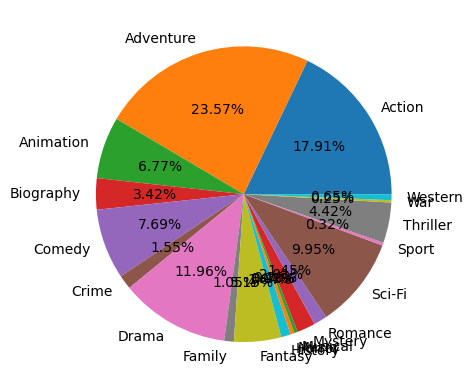

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [133]:
import matplotlib.pyplot as plt

plt.pie(ge_df['Percent'],labels=ge_df['genre'],autopct="%1.2f%%")
plt.show()

for i,r in ge_df.iterrows():
    print(r['genre'],r['Percent'])

# IMDB specific genre

In [145]:
a1=pd.read_sql_query("select Title from \
genre join IMDB on IMDB.Movie_id=genre.Movie_id where genre = 'Sci-Fi'",db)
a1

,Title
0,Gravity (2013)
1,The Avengers (2012)
2,Arrival (2016)
3,Captain America: Civil War (2016)
4,Captain America: The Winter Soldier (2014)
5,Edge of Tomorrow (2014)
6,Ex Machina (2014)
7,Guardians of the Galaxy (2014)
8,Her (2013)
9,Inception (2010)


In [146]:
a2=pd.read_sql_query("select Title from \
genre join IMDB on IMDB.Movie_id=genre.Movie_id where genre = 'Mystery'",db)
a2

,Title
0,Shutter Island (2010)
1,Arrival (2016)
2,Ex Machina (2014)
3,Gone Girl (2014)
4,Prisoners (2013)
5,The Girl with the Dragon Tattoo (2011)
6,The Hunger Games: Catching Fire (2013)


In [150]:
common_names = a1['Title'].isin(a2['Title'])
common_names

0     False
1     False
2      True
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Title, dtype: bool

In [149]:
result = a1[common_names]
print(result)

               Title
2     Arrival (2016)
6  Ex Machina (2014)


In [155]:
a2=pd.read_sql_query("select Title from \
genre join IMDB on IMDB.Movie_id=genre.Movie_id",db)
a2

,Title
0,12 Years a Slave (2013)
1,127 Hours (2010)
2,50/50 (2011)
3,About Time (2013)
4,Amour (2012)
...,...
346,Whiplash (2014)
347,Wreck-It Ralph (2012)
348,X-Men: Days of Future Past (2014)
349,X-Men: First Class (2011)
